Importing Libraries and Loading Data

In [21]:
# Importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Data Cleaning and Preprocessing**

Defining the column names as per thr UCI heart Disease dataset description

In [22]:
# Column names as given in the dataset description
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs",
    "restecg", "thalach", "exang", "oldpeak", "slope",
    "ca", "thal", "num"
]
# Loading  the dataset in same enviroment
data = pd.read_csv("heart.csv", names=columns, header=None)
# Replaceing ? with proper missing values With proper not a number
data = data.replace('?', np.nan)
# Checking first few rows of dataset
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


**Classification – Predicting Heart Disease**

We transform all values to numeric type. Any value that can not be transformed will be NaN.
then, we replace missing values with the median of each column.
The target column `num` is for heart disease status. We transform this into binary:
- 0 → No heart disease
- 1 → There's heart disease

Lastly, we divide the dataset into:
- `X` = all input features
- `y` = target label (`num`)

In [23]:
data = data.apply(pd.to_numeric, errors='coerce')
# Filling of missing values using column median of each column
data = data.fillna(data.median(numeric_only=True))
data['num'] = data['num'].apply(lambda x: 1 if x > 0 else 0)
X = data.drop('num', axis=1)
y = data['num']


**Regression – Predicting Cholesterol Level**

### Step 3: Classification – Heart Disease Prediction
Now we train two models for classification to predict whether an individual has heart disease:

1. **Logistic Regression** – A efficient model used for binary classification.
2. **Random Forest Classifier** – A sophisticated model that employs a lot of decision trees.

We scale all the features before training so that all features are on the same scale. This ensures models such as logistic regression function efficiently.

We then divide our data into training and test sets.

Upon training our models, we test them against:
- **Accuracy** (number of correct predictions)
- **Precision, Recall, F1-score** (model performance analysis)


In [24]:
# Importing models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Split into training & testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Print results
print("Accuracy of logistic regression:", accuracy_score(y_test, y_pred_log))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("Logistic Regression Report:\n")
print(classification_report(y_test, y_pred_log))

print("\nRandom Forest Report:\n")
print(classification_report(y_test, y_pred_rf))


Accuracy of logistic regression: 0.8360655737704918
Random Forest Accuracy: 0.8360655737704918
Logistic Regression Report:

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        34
           1       0.81      0.81      0.81        27

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61


Random Forest Report:

              precision    recall  f1-score   support

           0       0.83      0.88      0.86        34
           1       0.84      0.78      0.81        27

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



### Step 4: Prediction of Cholesterol Level

We attempt to predict an individual's **serum cholesterol level** (`chol`) based on the other clinical features.

For this, we apply a **Linear Regression model**, which attempts to determine the best-fit line for the data.

Prior to that:
- We drop the `chol` and `num` columns from the features
- Then, we scale the data and split it into train/test sets

We assess the model using:
- **MAE** (Average error)
- **RMSE** (How far predictions are from actual values)
- **R2 Score** (How well the model accounts for variation in `chol`)


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_reg = data.drop(['chol', 'num'], axis=1)
y_reg = data['chol']
X_reg_scaled = scaler.fit_transform(X_reg)
#split the data
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg_scaled, y_reg, test_size=0.2, random_state=1)
# Trainimg regression model
reg_model = LinearRegression()
reg_model.fit(Xr_train, yr_train)
yr_pred = reg_model.predict(Xr_test)
# result
print("MAE:", mean_absolute_error(yr_test, yr_pred))
print("RMSE:", np.sqrt(mean_squared_error(yr_test, yr_pred)))
print("R2 Score:", r2_score(yr_test, yr_pred))


MAE: 31.830689983713608
RMSE: 38.92002272301791
R2 Score: 0.10833883759293272


**Correlation Analysis – Heatmap**



We employ a heatmap to **visualize the correlation** among all columns in the dataset.

- Correlation informs us about how strongly two columns are related.
- Values close to +1 indicate strong positive correlation, values close to -1 indicate strong negative correlation.

This informs us which features can affect others, like which features correlate with `chol`



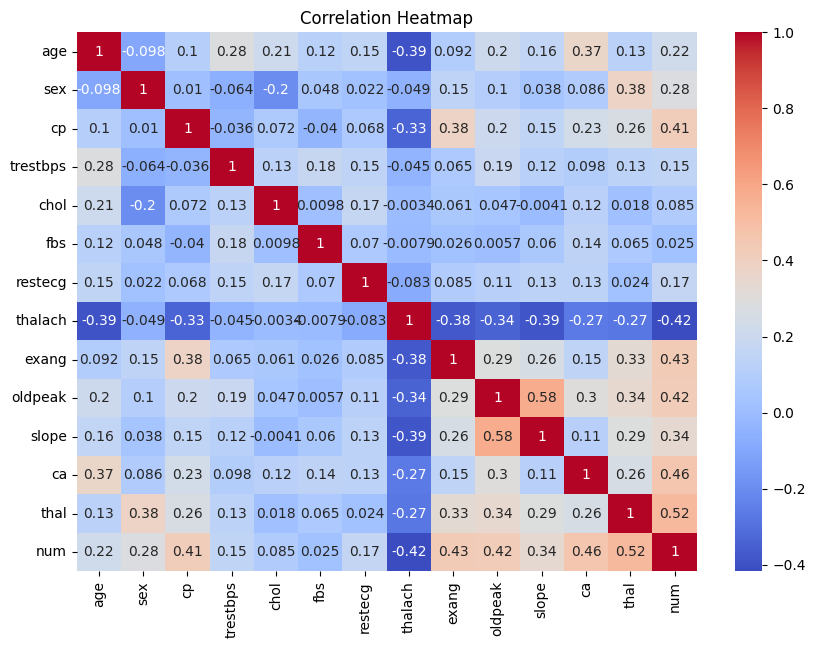

In [26]:
# Correlation matrix
corr = data.corr()

# Ploting of  heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


###  6: Principal Component Analysis

PCA is a method that helps us in **reducing the features of the data** while retaining most of the relevant information.

We run PCA on the scaled data and retain as many components as needed to **maintain 95% variance in the data**.

This assists us in:
- Simplifying the data
- Noise reduction
- Preparing it for the next step of clustering

Original shape: (303, 13)
Reduced shape: (303, 12)


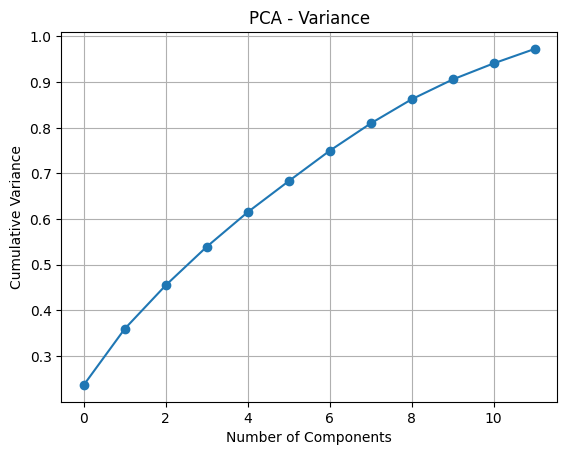

In [27]:
from sklearn.decomposition import PCA
# Using scaled data
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_pca = pca.fit_transform(X_scaled)
print("Original shape:", X_scaled.shape)
print("Reduced shape:", X_pca.shape)

# Plot variance
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title("PCA - Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance")
plt.grid(True)
plt.show()


###7: KMeans Clustering – Identifying Groups of Patients

We apply **KMeans**, an unsupervised machine learning algorithm, to cluster similar patients into groups.

We experiment with various values for **k**  ranging from 2 to 9.
We utilize:
- **Elbow Method** : assists in identifying where the "bend" occurs
- **Silhouette Score**: indicates how well the clusters are defined

This assists us in determining the optimal k for our data.

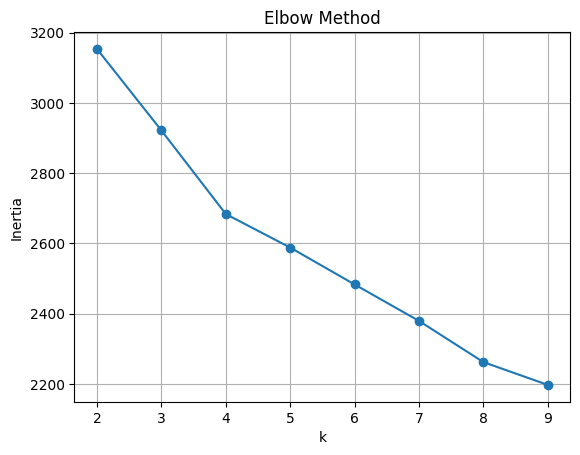

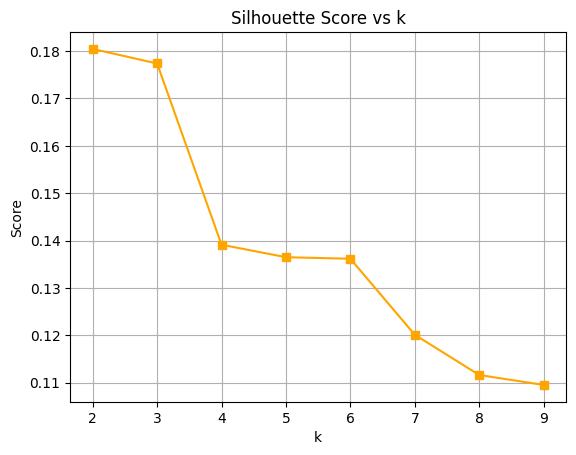

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
inertias = []
silhouettes = []

for k in range(2, 10):
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(X_pca)
    inertias.append(model.inertia_)
    silhouettes.append(silhouette_score(X_pca, model.labels_))

# Elbow plot method
plt.plot(range(2, 10), inertias, marker='o')
plt.title("Elbow Method")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Silhouette score plot method
plt.plot(range(2, 10), silhouettes, marker='s', color='orange')
plt.title("Silhouette Score vs k")
plt.xlabel("k")
plt.ylabel("Score")
plt.grid(True)
plt.show()


## **Conclusion**

We now run KMeans with 3 clusters, and visualize the output by plotting the first 2 PCA components.

Each point in the scatterplot corresponds to a patient, and their color indicates the cluster they are in.
This assists us in seeing how patients are clustered based on their health profile.

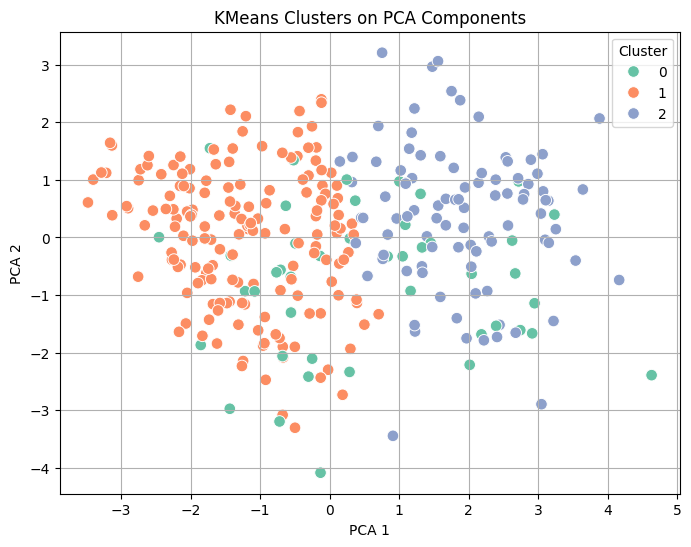

In [29]:
#For k=3
kmeans = KMeans(n_clusters=3, random_state=1)
clusters = kmeans.fit_predict(X_pca)

# Ploting of clusters on 2 PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2', s=70)
plt.title("KMeans Clusters on PCA Components")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()
